In [46]:
#Importing datasets
import pandas as pd
import DateTime
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_excel(r"Sales Data.xls",sheet_name='SalesData')
market = pd.read_excel(r"Sales Data.xls",sheet_name='MarketingCosts')

In [6]:
sales

,Date,ProductID,ProductName,Category,QuantitySold,PricePerUnit,TotalSales
0,2022-01-28,P189,Product_8,Beauty,11,484.73,5332.03
1,2022-03-19,P159,Product_9,Electronics,12,433.16,5197.92
2,2022-08-07,P199,Product_11,Sports,6,431.59,2589.54
3,2023-08-03,P195,Product_13,Clothing,6,189.92,1139.52
4,2023-03-10,P190,Product_12,Clothing,9,477.63,4298.67
...,...,...,...,...,...,...,...
4995,2021-09-25,P157,Product_1,Clothing,13,391.99,5095.87
4996,2021-11-24,P156,Product_15,Home & Kitchen,10,350.80,3508.00
4997,2021-01-28,P182,Product_3,Beauty,5,130.44,652.20
4998,2023-04-10,P123,Product_14,Clothing,4,87.18,348.72


In [7]:
market

,Date,MarketingChannel,Category,Cost
0,2021-01-31,Facebook Ads,Clothing,8540.22
1,2021-02-28,Instagram Ads,Sports,4813.46
2,2021-03-31,Facebook Ads,Home & Kitchen,7135.31
3,2021-04-30,Instagram Ads,Electronics,6296.22
4,2021-05-31,Affiliates,Home & Kitchen,6868.99
5,2021-06-30,Google Ads,Clothing,3802.92
6,2021-07-31,Instagram Ads,Clothing,5544.88
7,2021-08-31,Affiliates,Sports,1688.04
8,2021-09-30,Facebook Ads,Sports,3087.88
9,2021-10-31,Email Marketing,Clothing,4597.65


In [40]:
class KPIAnalyzer:
    def __init__(self, sales_data, market_data):
        self.sales_data = sales_data
        self.market_data = market_data
        self._preprocess_data()

    def _preprocess_data(self):  # preprocessing the data to get in a standard format
        self.sales_data['Date'] = pd.to_datetime(self.sales_data['Date'])
        self.sales_data['Year'] = self.sales_data['Date'].dt.year
        self.sales_data['Month'] = self.sales_data['Date'].dt.month

        self.market_data['Date'] = pd.to_datetime(self.market_data['Date'])
        self.market_data['Year'] = self.market_data['Date'].dt.year
        self.market_data['Month'] = self.market_data['Date'].dt.month

    def calculate_yearly_sales(self): # calc yearly sales and creating a graph for it
        yearly_sales = self.sales_data.groupby(['Year']).agg({'TotalSales': 'sum'}).reset_index()
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=yearly_sales, x='Year', y='TotalSales')
        plt.title('Yearly Total Sales')
        plt.xlabel('Year')
        plt.ylabel('Total Sales')
        plt.tight_layout()
        plt.savefig('yearly_sales.png')
        plt.close()
        return yearly_sales

    def calculate_yearly_category_sales(self): # calc yearly sales as per category and creating a graph for it
        yearly_category_sales = self.sales_data.groupby(['Year', 'Category']).agg({
            'QuantitySold': 'sum',
            'TotalSales': 'sum'
        }).reset_index()
        plt.figure(figsize=(10, 6))
        sns.barplot(data=yearly_category_sales, x='Year', y='TotalSales', hue='Category')
        plt.title('Yearly Total Sales by Category')
        plt.xlabel('Year')
        plt.ylabel('Total Sales')
        plt.tight_layout()
        plt.savefig('yearly_category_sales.png')
        plt.close()
        return yearly_category_sales

    def calculate_yearly_market_data(self):   # calc yearly marketing cost
        year_category_market = self.market_data.groupby(['Year', 'Category']).agg({'Cost': 'sum'}).reset_index()
        plt.figure(figsize=(10, 6))
        sns.barplot(data=year_category_market, x='Year', y='Cost', hue='Category')
        plt.title('Yearly Market Data by Category')
        plt.xlabel('Year')
        plt.ylabel('Cost')
        plt.tight_layout()
        plt.savefig('year_category_market.png')
        plt.close()
        return year_category_market

    def calculate_roi(self):  # calc ROM and AOV as per the data and getting plots for it
        yearly_category_sales = self.calculate_yearly_category_sales()
        year_category_market = self.calculate_yearly_market_data()
        roi_data = yearly_category_sales.merge(year_category_market, on=['Year', 'Category'], how='left')
        roi_data['Return_Marketing_Spend'] = roi_data['TotalSales'] / roi_data['Cost']
        roi_data['Average_Order_Value'] = roi_data['TotalSales'] / roi_data['QuantitySold']

        # ROI Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=roi_data, x='Year', y='Return_Marketing_Spend', hue='Category')
        plt.title('Return on Marketing Spend by Category')
        plt.xlabel('Year')
        plt.ylabel('Return on Marketing Spend')
        plt.tight_layout()
        plt.savefig('roi_plot.png')
        plt.close()

        # AOV Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=roi_data, x='Year', y='Average_Order_Value', hue='Category')
        plt.title('Average Order Value by Category')
        plt.xlabel('Year')
        plt.ylabel('Average Order Value')
        plt.tight_layout()
        plt.savefig('aov_plot.png')
        plt.close()

        return roi_data

    def run_all(self):  # creating a fucntion to runall every other function
        yearly_sales = self.calculate_yearly_sales()
        yearly_category_sales = self.calculate_yearly_category_sales()
        year_category_market = self.calculate_yearly_market_data()
        roi_data = self.calculate_roi()

        # Save to HTML
        self._save_to_html({
            'Yearly Total Sales': ('yearly_sales.png', yearly_sales),
            'Yearly Total Sales by Category': ('yearly_category_sales.png', yearly_category_sales),
            'Yearly Market Data by Category': ('year_category_market.png', year_category_market),
            'Return on Marketing Spend': ('roi_plot.png', roi_data),
            'Average Order Value': ('aov_plot.png', roi_data)
        })

    def _save_to_html(self, output_data):  # creating a html report out of it
        with open('KPI_Analysis_Report.html', 'w') as file:
            file.write('<html><head><title>KPI Analysis Report</title></head><body>')
            file.write('<h1>KPI Analysis Report</h1>')

            for section, (image_file, df) in output_data.items():
                file.write(f'<h2>{section}</h2>')

                file.write(df.to_html(index=False))
                file.write('<br>')

                file.write(f'<img src="{image_file}" alt="{section}" width="800"><br>')

            file.write('</body></html>')


In [41]:
kpi_analyzer = KPIAnalyzer(sales, market)
kpi_analyzer.run_all()


In [67]:
with open('file.html','w') as file:
    file.write('Analyis')
    
    for 

In [61]:
class kpi:
    def __init__(self,market_data,sales_data):
        self._market_data = market_data
        self._sales_data = sales_data
        
    def grp_by_sales(self):
        a = self._market_data.groupby('Category').agg( {'Cost':'sum'}).reset_index()
        plt.figure(figsize=(10,8))
        sns.barplot(data=a , x='Category',y='Cost')
        plt.title('Sales by category')
        return(a)
    
    def grp_chan(self):
        b = self._market_data.groupby("MarketingChannel").agg({'Cost':'sum'}).reset_index()
        plt.Figure(figsize=(10,8))
        ax=sns.barplot(data = b , x='MarketingChannel' , y='Cost')
        plt.xlabel('Cost')
        plt.ylabel('Category')
        plt.title('Hello')
        for i in ax.containers:
            ax.bar_label(i)
        return(b)

In [62]:
a = kpi(market_data=market,sales_data=sales)

,MarketingChannel,Cost
0,Affiliates,54779.50
1,Email Marketing,18923.89
2,Facebook Ads,61488.33
3,Google Ads,37483.81
4,Instagram Ads,28505.82


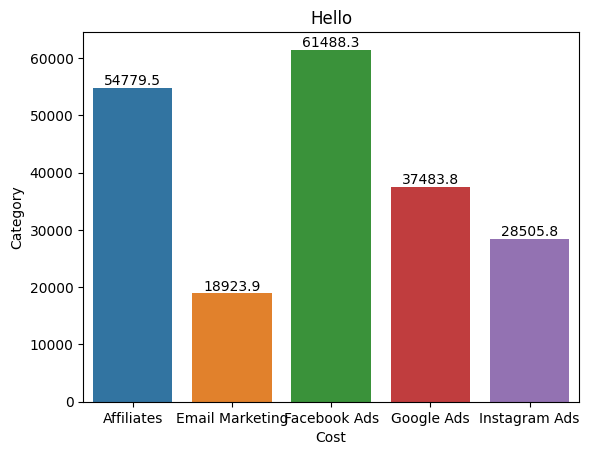

In [63]:
a.grp_chan()

In [79]:
a=market.groupby('Category').agg({'Cost':'sum'}).reset_index()
b,c,d=2,3,4

dct={
            'Yearly Total Sales': ('yearly_sales.png', a),
            'Yearly Total Sales by Category': ('yearly_category_sales.png', b),
            'Yearly Market Data by Category': ('year_category_market.png', c),
            'Return on Marketing Spend': ('roi_plot.png', d),
            'Average Order Value': ('aov_plot.png', d)
        }

In [80]:
dct.items()

dict_items([('Yearly Total Sales', ('yearly_sales.png',          Category      Cost
0          Beauty  18051.86
1        Clothing  38915.57
2     Electronics  33427.25
3  Home & Kitchen  32811.10
4          Sports  77975.57)), ('Yearly Total Sales by Category', ('yearly_category_sales.png', 2)), ('Yearly Market Data by Category', ('year_category_market.png', 3)), ('Return on Marketing Spend', ('roi_plot.png', 4)), ('Average Order Value', ('aov_plot.png', 4))])

In [85]:
for l,(i,k) in dct.items():
    print(l)
    print('--')
    print(i)
    print('--')
    print(k)

Yearly Total Sales
--
yearly_sales.png
--
         Category      Cost
0          Beauty  18051.86
1        Clothing  38915.57
2     Electronics  33427.25
3  Home & Kitchen  32811.10
4          Sports  77975.57
Yearly Total Sales by Category
--
yearly_category_sales.png
--
2
Yearly Market Data by Category
--
year_category_market.png
--
3
Return on Marketing Spend
--
roi_plot.png
--
4
Average Order Value
--
aov_plot.png
--
4
